In [48]:
# initialization stuff
from pylab import *
%matplotlib inline
import sympy as sym
from IPython.display import display, Latex

# set up variable and Gaussian function
x = sym.symbols('x')
f = sym.exp(-x**2)

$f(x) = e^{-x^2}$ is easy to expand in a Taylor series; just use the known Taylor series expansion for $e^x$:
$$e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...$$
and substitute in $-x^2$ in place of the 'x' in this series to get:
$$e^{-x^2} = 1 - x^2 + \frac{x^4}{2} - \frac{x^6}{3!} + \frac{x^8}{4!} - ...$$

Here is how to do this using the Python sympy package:

In [68]:
# Yes, you can go out further than 32 terms; this gets the point across, though
for N in [4, 8, 16, 32]:
    result = "$${} = {}$$".format("f(x)", sym.latex(f.series(x,0,N)))
    display(Latex(result))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

To calculate the expansion efficiently, define a function that sums up the terms up to (but not including) the Nth power:

In [50]:
def TayGauss(x, N = 4):
    # each term is of form (-1)^n x^(2n)/n!
    n_vals = range(N//2)
    result = sum([(-x**2)**n / factorial(n) for n in n_vals])
    return result
    

Compare the results of the analytical expansion to that of the numerical calculation to be convincing:  Choose different values of N in the cell below, should get the same numerical results from both methods of expansion:

In [66]:
# Choose number of terms by changing value of N in below line:
N = 8
# Set value of x at which to evaluate expansion:
xtry = 0.5

eval_f = f.series(x, 0, N).removeO()
analytical_result = eval_f.subs(x, xtry)
numerical_result  = TayGauss(xtry, N)
true_value = f.subs(x, xtry)
print(f"True Value:           {true_value}")
print(f"Analytical Expansion: {analytical_result}")
print(f"Numerical Expansion:  {numerical_result}")

True Value:           0.778800783071405
Analytical Expansion: 0.778645833333333
Numerical Expansion:  0.7786458333333334


Now make a plot to show how well the expansions of different orders fit the Gaussian function, and save a copy as a PDF

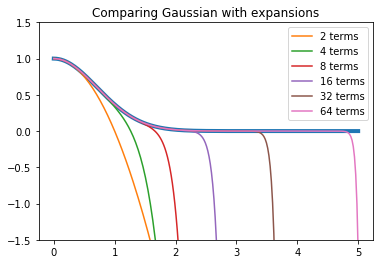

In [52]:
from scipy import vectorize
TG = vectorize(TayGauss)

x_array = linspace(0, 5, 250)
plot(x_array, exp(-x_array**2), lw=4)
for N in [4, 8, 16, 32, 64, 128]:
    # note:  half of terms are zero, hence dividing N by 2 in label
    plot(x_array, TG(x_array, N=N), label = "%d terms" % (N//2))
ylim([-1.5,1.5])
legend()
title("Comparing Gaussian with expansions");
# savefig("expandGauss.pdf") # uncomment to save figure locally

It's pretty easy to see visually why the integral of the short expansions give a negative result!